# SVM

In [15]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

import seaborn as sns
import eif as iso
import random as rn
import copy as copy

import time

In [35]:
df = pd.read_csv('imbd_log.csv')

# Mappa di raggruppamento
category_mapping = {
    'movie': 'Film',
    'tvMovie': 'Film',
    'short': 'Shorts',
    'tvShort': 'Shorts',
    'tvSeries': 'Serie TV',
    'tvMiniSeries': 'Serie TV',
    'tvEpisode': 'Serie TV',
    'tvSpecial': 'Speciale TV',
    'video': 'Video',
    'videoGame': 'Videogame'
}

# Applicare la mappa al dataframe
df['titleType'] = df['titleType'].map(category_mapping)

X = df.select_dtypes(include=['number'])
X = X.drop(['averageRating'], axis = 1)
X = X.values
y = np.array(df['titleType'])

## Data Partitioning

In [36]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# PCA

In [40]:
from sklearn.decomposition import PCA

In [41]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_train)

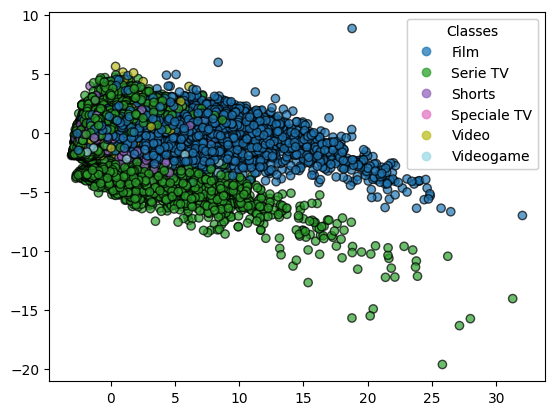

In [53]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Utilizza LabelEncoder per convertire le categorie in numeri
label_encoder = LabelEncoder()
y_train_numeric = label_encoder.fit_transform(y_train)

# Ora puoi usare y_train_numeric come argomento 'c' per plt.scatter
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train_numeric, cmap=plt.cm.tab20, edgecolor='k', alpha=0.7)

# Ottieni le etichette originali
labels = label_encoder.inverse_transform(range(len(label_encoder.classes_)))

# Aggiungi la leggenda con le etichette originali
handles, _ = scatter.legend_elements()
legend1 = plt.legend(handles, labels, title="Classes")
plt.gca().add_artist(legend1)

# Mostra il grafico
plt.show()

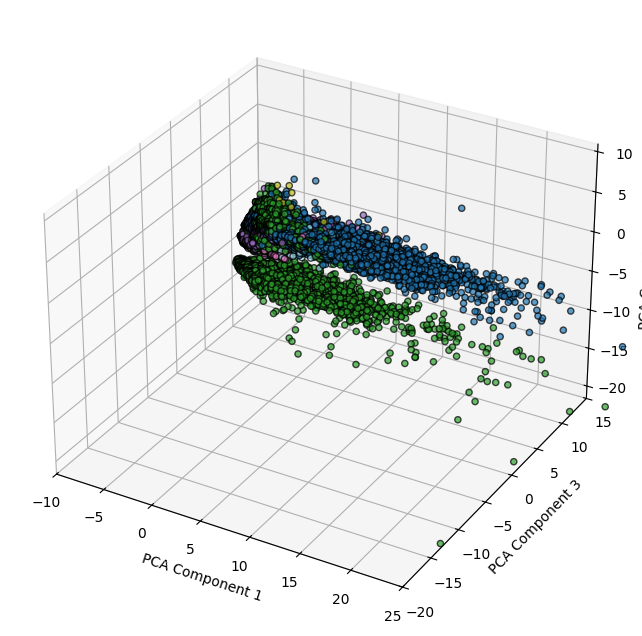

In [70]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assicurati che y_train sia definito
# y_train = <tuo array di etichette di training>

# Utilizza LabelEncoder per convertire le categorie in numeri
label_encoder = LabelEncoder()
y_train_numeric = label_encoder.fit_transform(y_train)

# Esegui PCA per ridurre a 3 componenti principali
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_train)

# Crea una figura 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Visualizza i dati in 3D
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 2], X_pca[:, 1], c=y_train_numeric, cmap=plt.cm.tab20, edgecolor='k', alpha=0.7)

# Aggiungi etichette agli assi
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 3')
ax.set_zlabel('PCA Component 2')

# Imposta i limiti sugli assi
ax.set_xlim([-10, 25])
ax.set_ylim([-20, 15])

# Mostra la figura
plt.show()

## Linear SVM

In [68]:
from sklearn.svm import LinearSVC

### K-fold and grid search

In [69]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Definisci i parametri da ottimizzare
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Crea il modello LinearSVC
clf = LinearSVC(random_state=42)

# Configura la k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Configura la grid search
grid_search = GridSearchCV(clf, param_grid, cv=kf, scoring='accuracy', verbose=1)

grid_search.fit(X_train, y_train)

# Ottieni i migliori parametri
best_params = grid_search.best_params_
print("Migliori parametri:", best_params)

# Addestra il modello con i migliori parametri
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

# Predici i risultati sul test set
y_pred = best_clf.predict(X_test)

# Predici i risultati sul training set
y_train_pred = best_clf.predict(X_train)

# Stampa le metriche di valutazione per il training set
print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
print('Train Classification Report:\n', classification_report(y_train, y_train_pred, zero_division=0))

# Stampa le metriche di valutazione per il test set
print('Test Accuracy %s' % accuracy_score(y_test, y_pred))
print('Test F1-score %s' % f1_score(y_test, y_pred, average=None))
print('Test Classification Report:\n', classification_report(y_test, y_pred, zero_division=0))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Migliori parametri: {'C': 10}
Train Accuracy 0.8170457910978208
Train F1-score [0.8262646  0.87524604 0.62200862 0.         0.41593087 0.125     ]
Train Classification Report:
               precision    recall  f1-score   support

        Film       0.84      0.81      0.83     30208
    Serie TV       0.82      0.94      0.88     57158
      Shorts       0.74      0.54      0.62     11653
 Speciale TV       0.00      0.00      0.00       804
       Video       0.64      0.31      0.42      3604
   Videogame       0.73      0.07      0.12      1244

    accuracy                           0.82    104671
   macro avg       0.63      0.44      0.48    104671
weighted avg       0.80      0.82      0.80    104671

Test Accuracy 0.8170307623718235
Test F1-score [0.82618297 0.87553975 0.6206576  0.00574713 0.4067346  0.10745234]
Test Classification Report:
               precision    recall  f1-score   support

        Film       0.

## Nonlinear SVM

In [8]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [8]:
# clf = SVC(gamma='auto')
# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)

# print('Accuracy %s' % accuracy_score(y_test, y_pred))
# print('F1-score %s' % f1_score(y_test, y_pred, average=None))
# print(classification_report(y_test, y_pred))

In [9]:
# Crea il modello SVM con kernel RBF
model = SVC(kernel='rbf', gamma='scale')

# Addestra il modello
model.fit(X_train, y_train)

# Fai previsioni
y_pred = model.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.39210878288007134
F1-score [0.         0.         0.         0.         0.10403531 0.20545894
 0.36092006 0.53877727 0.02892562 0.004662  ]


c:\Users\Lavigi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      (0, 1]       0.00      0.00      0.00        26
      (1, 2]       0.00      0.00      0.00       142
      (2, 3]       0.00      0.00      0.00       355
      (3, 4]       0.00      0.00      0.00      1033
      (4, 5]       0.37      0.06      0.10      2726
      (5, 6]       0.39      0.14      0.21      6398
      (6, 7]       0.39      0.34      0.36     11709
      (7, 8]       0.39      0.86      0.54     14567
      (8, 9]       0.63      0.01      0.03      6620
     (9, 10]       1.00      0.00      0.00      1284

    accuracy                           0.39     44860
   macro avg       0.32      0.14      0.12     44860
weighted avg       0.43      0.39      0.31     44860



c:\Users\Lavigi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lavigi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Definisci i kernel da testare
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Mantieni il parametro C a 0.001
C = 0.001

# Loop attraverso i diversi kernel
for kernel in kernels:
    print(f"Testing kernel: {kernel}")
    
    # Crea il modello SVM con il kernel specificato
    model = SVC(kernel=kernel, C=C, gamma='scale', random_state=42)
    
    # Addestra il modello
    model.fit(X_train, y_train)
    
    # Fai previsioni sul test set
    y_pred = model.predict(X_test)
    
    # Fai previsioni sul training set
    y_train_pred = model.predict(X_train)
    
    # Stampa le metriche di valutazione per il training set
    print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
    print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
    print('Train Classification Report:\n', classification_report(y_train, y_train_pred, zero_division=0))
    print("\n")
    
    # Stampa le metriche di valutazione per il test set
    print('Test Accuracy %s' % accuracy_score(y_test, y_pred))
    print('Test F1-score %s' % f1_score(y_test, y_pred, average=None))
    print('Test Classification Report:\n', classification_report(y_test, y_pred, zero_division=0))

Testing kernel: linear
